# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


# Описание данных

- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.sample(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18373,8,3500000.0,35.36,2018-10-27T00:00:00,1,NaN,5.0,10.4,2,NaN,...,14.3,NaN,Санкт-Петербург,47039.0,25599.0,1.0,126.0,1.0,979.0,33.0
10786,11,5800000.0,65.80,2018-11-27T00:00:00,3,2.6,12.0,42.8,10,NaN,...,7.3,NaN,Санкт-Петербург,29906.0,12738.0,1.0,655.0,0.0,NaN,66.0
6272,19,6100000.0,75.00,2019-03-27T00:00:00,3,2.6,9.0,42.0,1,NaN,...,7.0,NaN,Санкт-Петербург,34707.0,12945.0,0.0,NaN,0.0,NaN,11.0
18128,9,3750000.0,48.40,2018-08-03T00:00:00,1,NaN,4.0,20.4,2,NaN,...,17.2,NaN,деревня Кальтино,NaN,NaN,NaN,NaN,NaN,NaN,222.0
8492,3,7445866.0,53.80,2018-07-24T00:00:00,2,NaN,25.0,25.3,12,NaN,...,14.4,NaN,Санкт-Петербург,37227.0,15564.0,0.0,NaN,0.0,NaN,58.0


In [2]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
df.info()
print('Количество дубликатов: {}'.format(df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод


Проблемы, которые нужно решить и понять:

- отсутствую значения, много значений, очень много значений
Есть пропущенные значения например столбец is_apartment или studio - в них булево значение и если есть NaN, то логично, что данные не указаны и их можно споаойно заменить на False
Так же пропущенны значения расстояния до ближайших водоемов и парков - NaN. Их можно заменить на 0, если количество парков в радиусе 3 км тоже - 0. Либо на 3000 метров - если в радиусе 3км есть хоть 1 парк.
- некачественные названия столбцов
- некорректные типы данных


### Шаг 2. Предобработка данных

In [4]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [5]:
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m2',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',   
        'number_of_balconies',
        'city_name',
        'nearest_airport_distance_m',    
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_numbers_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']

df.columns = cols

In [6]:
# Убедимся, что столбцы переименованы
df.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m2',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'city_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_numbers_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [7]:
df.isnull().sum().sort_values()

total_images                      0
is_open_plan                      0
floor                             0
number_of_rooms                   0
is_studio                         0
total_area_m2                     0
last_price                        0
first_day_exposition              0
city_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_numbers_within_3km       5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m2              9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

In [8]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images                   0.000000
is_open_plan                   0.000000
floor                          0.000000
number_of_rooms                0.000000
is_studio                      0.000000
total_area_m2                  0.000000
last_price                     0.000000
first_day_exposition           0.000000
city_name                      0.206760
total_floors_in_house          0.362885
living_area_m2                 8.029875
kitchen_area_m2                9.612220
days_exposition               13.422507
ponds_numbers_within_3km      23.283683
parks_numbers_within_3km      23.283683
city_center_distance_m        23.287902
nearest_airport_distance_m    23.384953
ceiling_height_m2             38.799105
number_of_balconies           48.605426
nearest_pond_distance_m       61.559559
nearest_park_distance_m       65.909954
is_apartment                  88.290645
dtype: float64

## Населенные пункты

In [9]:
old_len_city = len(df['city_name'].unique())
df['city_name'] = df['city_name'].str.lower()
len(df['city_name'].unique())
# Не помогло
df['city_name'].unique().tolist()
df['city_name'] = df['city_name'].str.replace('ё', 'е', regex=True)
print('Убрали {} дубля'.format(old_len_city - len(df['city_name'].unique())))

print('Количество пропусков столбца city_name - {}'.format(df['city_name'].isnull().sum()))

df = df.dropna(subset=['city_name'])
print('Количество пропусков столбца city_name - {}'.format(df['city_name'].isnull().sum()))


Убрали 34 дубля
Количество пропусков столбца city_name - 49
Количество пропусков столбца city_name - 0


### Вывод
Пустых строк всего лишь 49 - это менее 1% от всех данных. Такие данные к анализу не приведут.

##  Количество этажей в доме

In [10]:
print('Количество пропусков столбца total_floors_in_house - {}'.format(df['total_floors_in_house'].isnull().sum()))
df['total_floors_in_house'] = df['total_floors_in_house'].fillna(1)
print('Количество пропусков столбца total_floors_in_house - {}'.format(df['total_floors_in_house'].isnull().sum()))

Количество пропусков столбца total_floors_in_house - 85
Количество пропусков столбца total_floors_in_house - 0


### Вывод
Можно предположить, что это одноэтажные дома. Заполним пропуски значением 1. Даже если наше предположение ошибочно, 86 записей не должны сильно сдвинуть распределение.

## Апартаменты

In [11]:
print('Количество пропусков столбца is_apartment - {}'.format(df['is_apartment'].isnull().sum()))
df['is_apartment'] = df['is_apartment'].fillna(0)
print('Количество пропусков столбца is_apartment - {}'.format(df['is_apartment'].isnull().sum()))

Количество пропусков столбца is_apartment - 20890
Количество пропусков столбца is_apartment - 0


### Вывод
Отсутсвие значений можно спокойно заменить на False, так как это у нас булевский столбец

## Количество балконов

In [12]:
print('Количество пропусков столбца number_of_balconies - {}'.format(df['number_of_balconies'].isnull().sum()))

df['number_of_balconies'] = df['number_of_balconies'].fillna(0)
print('Количество пропусков столбца number_of_balconies - {}'.format(df['number_of_balconies'].isnull().sum()))

Количество пропусков столбца number_of_balconies - 11513
Количество пропусков столбца number_of_balconies - 0


### Вывод
Отсутсвие значений на количество балконов говорит нам об их отсутсвии. 
Если данные взяты с пользователей,что их вводили, то отсавили бы они поле пустым?

## Расстояние до парков и водоемов

In [13]:
print('Количество пропусков столбца nearest_pond_distance_m - {}'.format(df['nearest_pond_distance_m'].isnull().sum()))
print('Количество пропусков столбца nearest_park_distance_m - {}'.format(df['nearest_park_distance_m'].isnull().sum()))
df.loc[(df['nearest_pond_distance_m'].isnull()) &
        (df['ponds_numbers_within_3km'] > 0 ) ,'nearest_pond_distance_m'] = 3000
df.loc[(df['nearest_pond_distance_m'].isnull()) &
       (df['ponds_numbers_within_3km'] < 1 ) ,'nearest_pond_distance_m'] = 0

df.loc[(df['nearest_park_distance_m'].isnull()) &
       (df['parks_numbers_within_3km'] > 0 ) ,'nearest_park_distance_m'] = 3000
df.loc[(df['nearest_park_distance_m'].isnull()) &
       (df['parks_numbers_within_3km'] < 1 ) ,'nearest_park_distance_m'] = 0

#но мы не избавились от всех пропусков
print('Количество пропусков столбца nearest_pond_distance_m - {}'.format(df['nearest_pond_distance_m'].isnull().sum()))
print('Количество пропусков столбца nearest_park_distance_m - {}'.format(df['nearest_park_distance_m'].isnull().sum()))

print('Количество пропусков столбца parks_numbers_within_3km - {}'.format(df['parks_numbers_within_3km'].isnull().sum()))
print('Количество пропусков столбца ponds_numbers_within_3km - {}'.format(df['ponds_numbers_within_3km'].isnull().sum()))

df['parks_numbers_within_3km'] = df['parks_numbers_within_3km'].fillna(0)
df['ponds_numbers_within_3km'] = df['ponds_numbers_within_3km'].fillna(0)

df['nearest_pond_distance_m'] = df['nearest_pond_distance_m'].fillna(4000)
df['nearest_park_distance_m'] = df['nearest_park_distance_m'].fillna(4000)

#Проверим что пропусков точно нет
print('Количество пропусков столбца nearest_pond_distance_m - {}'.format(df['nearest_pond_distance_m'].isnull().sum()))
print('Количество пропусков столбца nearest_park_distance_m - {}'.format(df['nearest_park_distance_m'].isnull().sum()))

print('Количество пропусков столбца parks_numbers_within_3km - {}'.format(df['parks_numbers_within_3km'].isnull().sum()))
print('Количество пропусков столбца ponds_numbers_within_3km - {}'.format(df['ponds_numbers_within_3km'].isnull().sum()))


Количество пропусков столбца nearest_pond_distance_m - 14565
Количество пропусков столбца nearest_park_distance_m - 15586
Количество пропусков столбца nearest_pond_distance_m - 5510
Количество пропусков столбца nearest_park_distance_m - 5510
Количество пропусков столбца parks_numbers_within_3km - 5510
Количество пропусков столбца ponds_numbers_within_3km - 5510
Количество пропусков столбца nearest_pond_distance_m - 0
Количество пропусков столбца nearest_park_distance_m - 0
Количество пропусков столбца parks_numbers_within_3km - 0
Количество пропусков столбца ponds_numbers_within_3km - 0


### Вывод
- Пропущенные значения расстояния до ближайших водоемов и парков = NaN. 
Их можно заменить на 0, если количество парков в радиусе 3 км тоже - 0. 
Либо на 3000 метров - если в радиусе 3км есть хоть 1 парк, но мы пока не зибавились от всех пропусков

- Пропущенные значения у столбцов parks_numbers_within_3km и ponds_numbers_within_3km. Пользователь мог не вводить данные в связи отсутсвии парков или водоемов вокруг его. Поэтому заменим их на - 0

- Оставшие пропущенные значения у столбцов nearest_pond_distance_m и nearest_park_distance_m тоже заменим на 4000 метров, так как нет данных что парки находяться рядом в районе 3км, то пометим их больше 3км. При анализе такие значения будет не сложно фильтровать. 0 будет означать отсутсвия парков.

## Площадь квартиры, кухни, жилых комнат

Количество пропусков жилой площади - 1898
Количество пропусков кухни - 2269
Количество пропусков жилой площади - 1460
Количество пропусков кухни - 1460


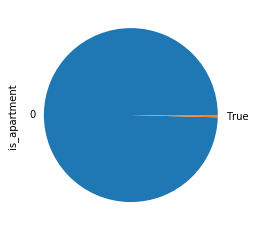

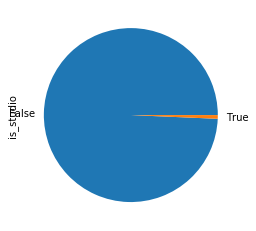

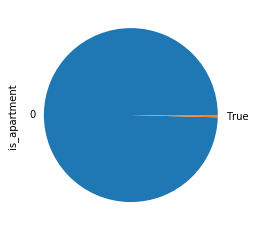

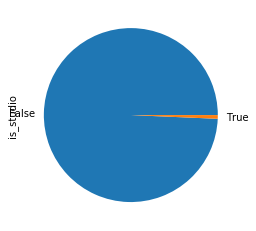

Количество пропусков жилой площади - 0
Количество пропусков кухни - 0


In [14]:
print('Количество пропусков жилой площади - {}'.format(df['living_area_m2'].isnull().sum()))
print('Количество пропусков кухни - {}'.format(df['kitchen_area_m2'].isnull().sum()))

df.loc[~(df['kitchen_area_m2'].isnull()) ,'living_area_m2'] = df['total_area_m2'] - df['kitchen_area_m2']
df.loc[~(df['living_area_m2'].isnull()) ,'kitchen_area_m2'] = df['total_area_m2'] - df['living_area_m2']
#но мы пока не зибавились от всех пропусков
print('Количество пропусков жилой площади - {}'.format(df['living_area_m2'].isnull().sum()))
print('Количество пропусков кухни - {}'.format(df['kitchen_area_m2'].isnull().sum()))

null_living_area = df[df['living_area_m2'].isnull()]
null_living_area['is_apartment'].value_counts().plot(kind='pie')
plt.show()
null_living_area['is_studio'].value_counts().plot(kind='pie')
plt.show()
#не может - заполняем медианой
df.loc[df['living_area_m2'].isnull(), 'living_area_m2'] = df['living_area_m2'].median()
#проверим тоже самое для кухни
null_kitchen_area_m2 = df[df['kitchen_area_m2'].isnull()]
null_kitchen_area_m2['is_apartment'].value_counts().plot(kind='pie')
plt.show()
null_kitchen_area_m2['is_studio'].value_counts().plot(kind='pie')
plt.show()
#решение такое же - заполняем медианой
df.loc[df['kitchen_area_m2'].isnull(), 'kitchen_area_m2'] = df['kitchen_area_m2'].median()
print('Количество пропусков жилой площади - {}'.format(df['living_area_m2'].isnull().sum()))
print('Количество пропусков кухни - {}'.format(df['kitchen_area_m2'].isnull().sum()))


### Вывод
- Для квартир в которых есть данные о площади кухни ИЛИ жилой части - можно у другой части вычеслить по формуле total_area = living_area + kitchen_area
,но мы пока не зибавились от всех пропусков
- Чтобы избавиться от отсавших пропусков можно было бы заполнить медиано
Заполнить пропуски медианой – не совсем правильное решение, т.к. медиана может быть больше общей площади квартиры.
ИТОГ - заполняем медианой 

## От публикации до снятия

In [15]:
print('Количество пропусков столбца days_exposition - {}'.format(df['days_exposition'].isnull().sum()))

df.loc[df['days_exposition'].isnull(), 'days_exposition'] = df['days_exposition'].median()
print('Количество пропусков столбца days_exposition - {}'.format(df['days_exposition'].isnull().sum()))


Количество пропусков столбца days_exposition - 3180
Количество пропусков столбца days_exposition - 0


### Вывод
На эти пропуски мы могли бы указать разработчикам портала недвижимости, ведь дата публикации есть у всех записей, и они явно могут определить, когда объявление было снято с публикации. Для восстановления пропусков у нас нет подходящего признака, поэтому заполним их медианой. 

## Расстояние до аэропорта или центра города

In [16]:
median_df = df.pivot_table(
    index='city_name',
    values=['nearest_airport_distance_m', 'city_center_distance_m'],
    aggfunc='median'
)
print(median_df)
median_df_citys = list(median_df.index)
print(median_df_citys)

def fill_null_df(row, col):
    city = row['city_name']
    
    if city in median_df_citys:
        return median_df.loc[city][col]
    
    return row[col]

columns = ['nearest_airport_distance_m', 'city_center_distance_m']

for column in columns:
    df.loc[df[column].isnull(), column] = df.apply(fill_null_df, axis=1, args=(column,))
    
    
# Проверим данные по скольким населенные пунктам не удалось заполнить
len(df[df['city_center_distance_m'].isnull()]['city_name'].unique())

print(df[df['city_center_distance_m'].isnull()]['city_name'].unique())

max_city_center_distance = max(df['city_center_distance_m'])
max_airport_distance = max(df['nearest_airport_distance_m'])

df['city_center_distance_m'] = df['city_center_distance_m'].fillna(max_city_center_distance)
df['nearest_airport_distance_m'] = df['nearest_airport_distance_m'].fillna(max_airport_distance)

                         city_center_distance_m  nearest_airport_distance_m
city_name                                                                  
зеленогорск                             53381.0                     72282.0
колпино                                 32018.0                     26232.0
красное село                            29140.5                     25715.5
кронштадт                               49575.0                     67850.0
ломоносов                               51677.0                     48415.5
павловск                                32683.0                     20529.5
петергоф                                33771.0                     39231.0
поселок александровская                 27468.0                     12896.5
поселок белоостров                      38868.0                     57769.0
поселок левашово                        25727.0                     52693.0
поселок лисий нос                       28226.0                     55909.0
поселок мета

### Вывод
Часть пропусков признаков расстояние airports_nearest, cityCenters_nearest попробуем заполнить медианой по срезу данных по населенному пункту. Но как мы видим, для некоторых записей восстановить пропуски мы не сможем. В этих случаях, скорее всего, пропуски появляются в населенных пунктах, которые не являются городами или прилично удалены от административных центров. Либо же нет картографических данных для рассчета расстояний.

Итог - 305

Видно наглядно, что данные по которым не удалось заполнить данные - это деревни. Заменим эти данные на максимальные значения столбцов, так как вероятность отсуствия данных заключается в слишком большом расстоянии от дома.

## Высота потолков

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height_m2, dtype: float64


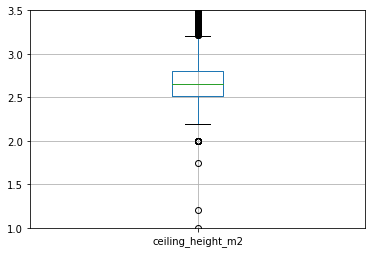

In [17]:
print(df['ceiling_height_m2'].describe())
plt.ylim(1, 3.5)
df.boxplot('ceiling_height_m2')
plt.show()

df['ceiling_height_m2'] = df['ceiling_height_m2'].fillna(df['ceiling_height_m2'].median())

### Вывод
- Большая часть значений лежит в диапазоне до 2.8 м комнат, что выглядит правдаподобно.
- Первый квартиль находится на уровне 2.5 м.
- Нижний "ус" упирается в 2.2 м
- Верхний ус заканчивается около 3.2 м.

В среднем, параметр высоты потолков должен колебаться в пределах 2.4 - 3.2 м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м.

## Замена типа данных

In [18]:
# Теперь поменяем типы столбцов
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

# float63 -> int64
for column in ['number_of_balconies', 'total_floors_in_house', 'days_exposition', 'nearest_pond_distance_m', 
               'nearest_park_distance_m', 'parks_numbers_within_3km', 'ponds_numbers_within_3km']:
    df[column] = df[column].astype('int')

df['is_apartment'] = df['is_apartment'].astype('bool')



### Вывод
Тип заменен на int в тех таблицах, которые в тип float выглядят не коректно. Не бывает 1.5 балконов или этажей

Типы данных не были заменены у площадей, так как это сильно может повлиять на цену на 1$м^2$

In [19]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images                  0.0
ponds_numbers_within_3km      0.0
nearest_park_distance_m       0.0
parks_numbers_within_3km      0.0
city_center_distance_m        0.0
nearest_airport_distance_m    0.0
city_name                     0.0
number_of_balconies           0.0
kitchen_area_m2               0.0
is_open_plan                  0.0
is_studio                     0.0
is_apartment                  0.0
floor                         0.0
living_area_m2                0.0
total_floors_in_house         0.0
ceiling_height_m2             0.0
number_of_rooms               0.0
first_day_exposition          0.0
total_area_m2                 0.0
last_price                    0.0
nearest_pond_distance_m       0.0
days_exposition               0.0
dtype: float64

### ВЫВОД
от пропусков избавились

### Шаг 3. Посчитайте и добавьте в таблицу

### Цену квадратного метра

In [20]:
df['price_m2'] = df['last_price'] / df['total_area_m2']

### День недели, месяц и год публикации объявления

In [21]:
df['singly_day_exposition'] = df['first_day_exposition'].dt.dayofweek
df['singly_month_exposition'] = df['first_day_exposition'].dt.month
df['singly_year_exposition'] = df['first_day_exposition'].dt.year

In [22]:
df.head(5)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m2,total_floors_in_house,living_area_m2,floor,is_apartment,...,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_numbers_within_3km,nearest_pond_distance_m,days_exposition,price_m2,singly_day_exposition,singly_month_exposition,singly_year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,83.0,8,False,...,16028.0,1,482,2,755,95,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,29.4,1,False,...,18603.0,0,0,0,0,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,47.7,4,False,...,13933.0,1,90,2,574,558,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,42.9,9,False,...,6800.0,2,84,3,234,424,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,59.0,13,False,...,8098.0,2,112,1,48,121,100000.000000,1,6,2018


### Этаж квартиры

In [23]:
def categorize_floor_in_house(row):
    """Категоризация этажей"""

    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'
    
    
df.loc[:, 'floor'] = df.apply(categorize_floor_in_house, axis=1)


In [24]:
df['floor'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor, dtype: int64

### Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [25]:
df['kitchen_total_areas_ration'] = df['kitchen_area_m2'] / df['total_area_m2']
df['living_total_areas_ration'] = df['living_area_m2'] / df['total_area_m2']

In [26]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m2,total_floors_in_house,living_area_m2,floor,is_apartment,...,nearest_park_distance_m,ponds_numbers_within_3km,nearest_pond_distance_m,days_exposition,price_m2,singly_day_exposition,singly_month_exposition,singly_year_exposition,kitchen_total_areas_ration,living_total_areas_ration
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,83.0,другой,False,...,482,2,755,95,120370.370370,3,3,2019,0.231481,0.768519
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,29.4,первый,False,...,0,0,0,81,82920.792079,1,12,2018,0.272277,0.727723
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,47.7,другой,False,...,90,2,574,558,92785.714286,3,8,2015,0.148214,0.851786
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,42.9,другой,False,...,84,3,234,424,408176.100629,4,7,2015,0.058491,0.269811
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,59.0,другой,False,...,112,1,48,121,100000.000000,1,6,2018,0.410000,0.590000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Площадь

In [27]:
df['total_area_m2'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area_m2, dtype: float64

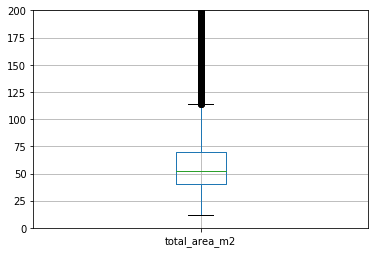

In [28]:
plt.ylim(0, 200)
df.boxplot('total_area_m2')
plt.show()

- 75% значений лежит в диапазоне до 70 кв.м., что выглядит правдаподобно.
- Первый квартиль находится на уровне 40 кв.м.
- Нижний "ус" упирается в 12, минимальное значение. Да, на самом деле есть квартиры 12 кв.м.
- Верхний ус заканчивается около 115 кв.м.

Все, что лежит за ориентировочной границей нормального размаха, считаем выбросом.
Таким образом, нам нужен будет следующией диапазон значений: 12 – 115 кв.м.

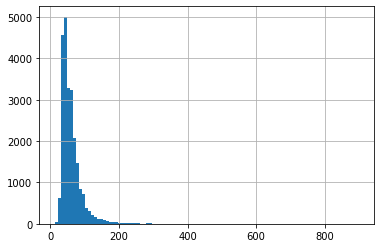

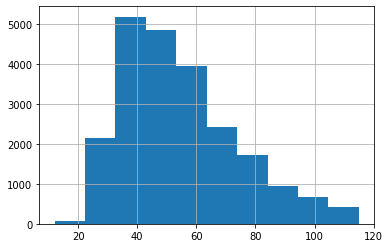

In [29]:
# Данные с выбросами
df['total_area_m2'].hist(bins=100)
plt.show()
# Данные без выбросов и ошибок
good_total_area_m2 = df.query('total_area_m2 >= 12 and total_area_m2 <= 115')['total_area_m2']
good_total_area_m2.hist()
plt.show()

### Цена

In [30]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

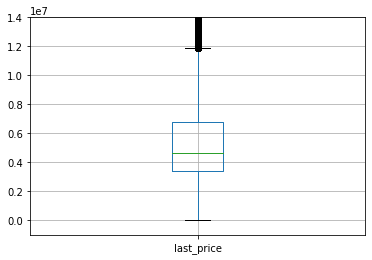

In [31]:
plt.ylim(-1e+06, 1.4e+07)
df.boxplot('last_price')
plt.show()

- 75% значений лежит в диапазоне до 7 млн., что выглядит правдаподобно.
- Первый квартиль на уровне 3.4 млн.
- Нижний "ус" упирается в 0, а минимальная цена равна 12 190, в то время как средняя стоимость недвижимости – 6.5 млн.
Это выглядит подозрительным. Взглянем на подобные записи.

In [32]:
bad_df = df.query('last_price < 4.5e+5')
bad_df.sort_values('last_price').head()[['city_name', 'last_price', 'total_area_m2']]

,city_name,last_price,total_area_m2
8793,санкт-петербург,12190.0,109.0
14911,поселок станции свирь,430000.0,54.0
17456,сланцы,430000.0,30.4
16274,деревня старополье,440000.0,40.0


В Санкт-Петербурге квартира площадью 109 кв.м. с ценой ->  12 190 руб. 
Это явная ошибка в данных

Возьмем нижнюю границу для данных без выбросов в 430 тыс. Такая стоимость для деревень выглядит правдоподобно.

На диаграмме boxplot видно, что верхний "ус" заканчивается на стоимости 12 000 000. Данные выше этого значения считаются выбросами. Хотя в крупных города, есть много очень дорогой недвижимости, запредельная стоимость которой, является правдоподобной.

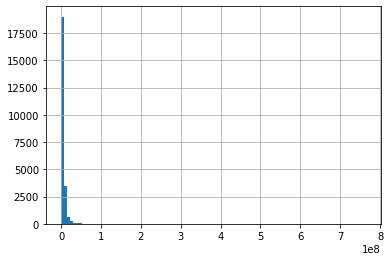

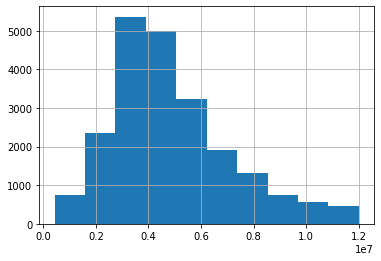

In [33]:
# Данные с выбросами
df['last_price'].hist(bins=100)
plt.show()
# Данные без выбросов и ошибок
good_last_price = df.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price']
good_last_price.hist()
plt.show()

### Число комнат

In [34]:
df['number_of_rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: number_of_rooms, dtype: float64

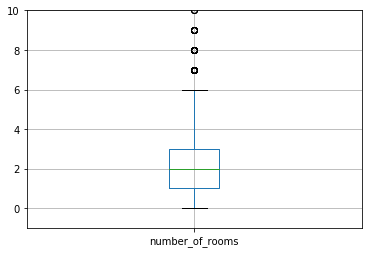

In [35]:
plt.ylim(-1, 10)
df.boxplot('number_of_rooms')
plt.show()

- 75% значений лежит в диапазоне до 3х комнат, что выглядит правдаподобно.
- Первый квартиль находится на уровне 1 комнаты.
- Нижний "ус" упирается в 0, минимальное значение - это можно считать за ошибку в данных.
- Верхний ус заканчивается около 6.
- Выбросы лежат за ориентировочной границей нормального распределения.

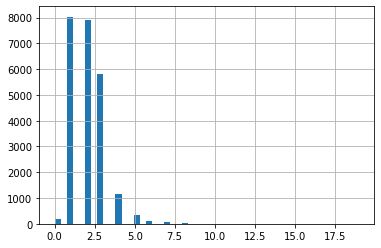

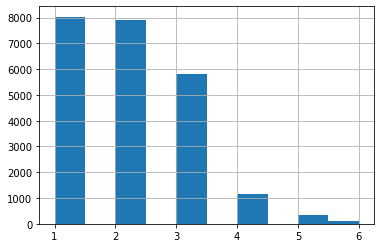

In [36]:
# Данные с выбросами
df['number_of_rooms'].hist(bins=50)
plt.show()
# Данные без выбросов и ошибок
good_number_of_rooms = df.query('number_of_rooms >= 1 and number_of_rooms <= 6')['number_of_rooms']
good_number_of_rooms.hist()
plt.show()

Самые распространенные квартиры это 1-3 комнатные

### Высота потолков

In [37]:
df['ceiling_height_m2'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height_m2, dtype: float64

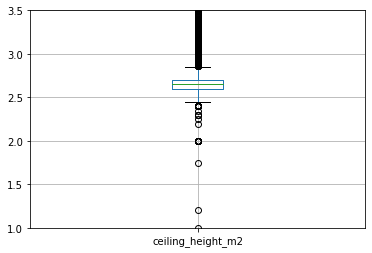

In [38]:
plt.ylim(1, 3.5)
df.boxplot('ceiling_height_m2')
plt.show()

По данной таблицы анализ был проведен по заполненым пропускам. Данные касательно заполнения пропусков слегка изменили график boxplot, но не полвияли на то что в среднем, параметр высоты потолков 2.4 - 3.2 м. Минимальная высота потолка определяется строительными нормами и правилами обычно как 2.5 м.

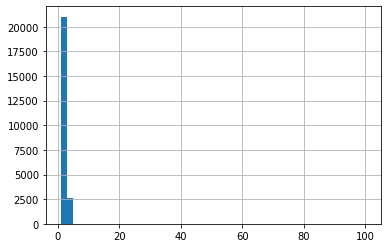

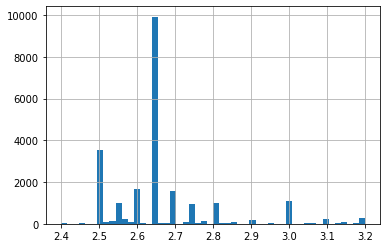

In [39]:
# Данные с выбросами
df['ceiling_height_m2'].hist(bins=50)
plt.show()
# Данные без выбросов и ошибок
good_ceiling_height_m2 = df.query('ceiling_height_m2 >= 2.4 and ceiling_height_m2 <= 3.2')['ceiling_height_m2']
good_ceiling_height_m2.hist(bins=50)
plt.show()

### Время продажи

In [40]:
df['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

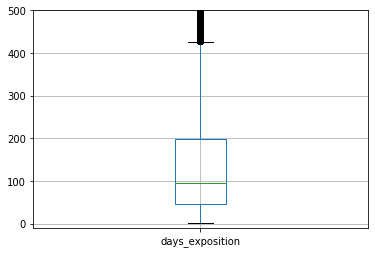

In [41]:
plt.ylim(-10, 500)
df.boxplot('days_exposition')
plt.show()


- 75% значений лежит в диапазоне до 198 дней, что выглядит правдоподобно. Квартиру быстро не продашь
- Првый квартиль лежит на уровне 45 дней.
- Нижний "ус" упирается в 1, минимальное значение.
- Верхний заканчивается в около 420 дней.

Из этого следует:
- продажа обычно занимает 95 дней;
- если объект продан в течение 50 дней – это быстро
- также есть вероятность, что собственник передумал продавать квартиру и снял объявление с публикации. Стоит ли отсекать такие значения? Будем рассматривать временной промежуток от недели.
- если в диапазоне от 200 дней – очень долго.

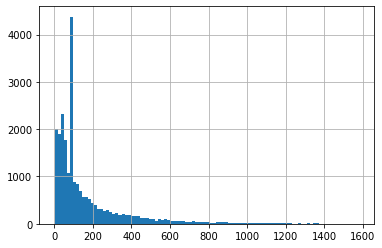

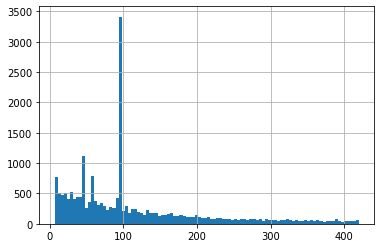

In [42]:
# Данные с выбросами
df['days_exposition'].hist(bins=100)
plt.show()
# Данные без выбросов и ошибок
good_days_exposition = df.query('days_exposition >= 7 and days_exposition <= 420')['days_exposition']
good_days_exposition.hist(bins=100)
plt.show()

### Факторы, влияющие на стоимость недвижимости

Факторы будем рассматривать в контексте данных, прошедших очистку на предыдущих этапах. 
Срезы сохранены в следующих переменных:

In [43]:
total_area_query = 'total_area_m2 >= 12 and total_area_m2 <= 115'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'number_of_rooms >= 1 and number_of_rooms <= 6'
ceiling_height_query = 'ceiling_height_m2 >= 2.4 and ceiling_height_m2 <= 3.2'
days_exposition_query = 'days_exposition >= 7 and days_exposition <= 420'

#### Зависимость стоимости недвижимости от цены квадратного метра

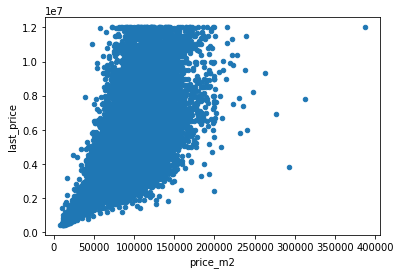

In [44]:
clean_df = df.query(total_area_query and last_price_query)
clean_df.plot(x='price_m2', y='last_price', kind='scatter')
plt.show()

In [45]:
clean_df['price_m2'].corr(clean_df['last_price'])

0.6076566035699482

#### вывод 
По графикам и коэффициенту корреляции видно, что взаимосвязь между изменением цены за квадратный метр и ростом стоимости недвижимости есть.

#### Зависимость стоимости недвижимости от числа комнат

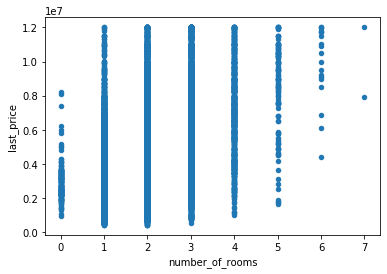

In [46]:
clean_df = df.query(rooms_query and last_price_query)

clean_df.plot(x='number_of_rooms', y='last_price', kind='scatter')
plt.show()

In [47]:
clean_df['number_of_rooms'].corr(clean_df['last_price'])

0.45741915906415

#### вывод 
По графикам и коэффициенту корреляции видно, что взаимосвязь между количеством комнат и стоимостью недвижимости 
есть -> НО слабая 

#### Зависимость стоимости недвижимости от этажа

In [48]:
df[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price')

,last_price
floor,
другой,5.070738e+06
первый,4.160734e+06
последний,4.532461e+06


- Первый этаж – самый дешевый 
- Этажи между как видно самые дорогие
- Последний этаж выступает средним между другими и первым

#### Зависимость стоимости недвижимости от удалённости до центра города

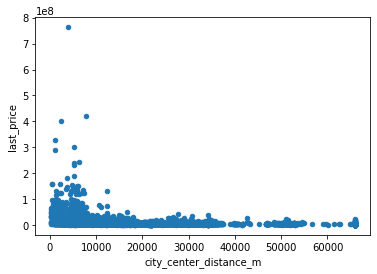

In [49]:
clean_df = df.query(last_price_query)
df.plot(x='city_center_distance_m', y='last_price', kind='scatter')
plt.show()

In [50]:
clean_df['city_center_distance_m'].corr(clean_df['last_price'])

-0.541151939868345

- По коэффициенту Пирсона видно, что взаимосвязь между расстоянием от центра и ценой -> близка к -1.
- А по графику видно что основная часть дорогих объектов ближе к центру.

#### Зависимость стоимости недвижимости от даты публикации объявления

In [51]:
clean_df = df.query(days_exposition_query and last_price_query)
clean_df[['singly_day_exposition', 'singly_month_exposition', 'singly_year_exposition', 'last_price']].corr()

,singly_day_exposition,singly_month_exposition,singly_year_exposition,last_price
singly_day_exposition,1.000000,0.011474,-0.002846,-0.014904
singly_month_exposition,0.011474,1.000000,-0.267940,0.005329
singly_year_exposition,-0.002846,-0.267940,1.000000,-0.004033
last_price,-0.014904,0.005329,-0.004033,1.000000


- Связи между днями недели, месяцами, годами публикации и стоимостью недвижимости -> нет, коэффицент Пирсона равен 0
- из таблицы связь есть только между месяцем и годом, но это не влияет на зависимость со стоимостью

#### 10 населённых пунктов с наибольшим числом объявлений

In [52]:
top_city_name = df['city_name'].value_counts().head(10)
top_city_name_index = list(top_city_name.index)
top_city_name_query = 'city_name in @top_city_name_index'
top_city_name

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: city_name, dtype: int64

In [53]:
(
    df.query(top_city_name_query and last_price_query)
    .pivot_table(index='city_name', values='price_m2')
    .sort_values(by='price_m2', ascending=False)
)

,price_m2
city_name,
санкт-петербург,105628.948318
поселок лисий нос,100660.814239
зеленогорск,100636.523580
пушкин,100322.823868
кудрово,99903.345867
...,...
поселок совхозный,12629.129129
деревня выскатка,12335.480902
деревня вахнова кара,11688.311688


- Санкт-Петербурге квадратный метр самый дорогой
- деревня Cтарополье – самый дешевый.

Почти в 10 раз разница между Питером и деревней Cтарополье

### Предложения квартир в Санкт-Петербурге

In [54]:
piter_df = pd.DataFrame(df.loc[df['city_name'] == "санкт-петербург"])
piter_df.reset_index()
piter_df

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m2,total_floors_in_house,living_area_m2,floor,is_apartment,...,nearest_park_distance_m,ponds_numbers_within_3km,nearest_pond_distance_m,days_exposition,price_m2,singly_day_exposition,singly_month_exposition,singly_year_exposition,kitchen_total_areas_ration,living_total_areas_ration
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,83.00,другой,False,...,482,2,755,95,120370.370370,3,3,2019,0.231481,0.768519
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,47.70,другой,False,...,90,2,574,558,92785.714286,3,8,2015,0.148214,0.851786
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,42.90,другой,False,...,84,3,234,424,408176.100629,4,7,2015,0.058491,0.269811
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,59.00,другой,False,...,112,1,48,121,100000.000000,1,6,2018,0.410000,0.590000
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,52.70,другой,False,...,0,0,0,95,110544.692737,3,4,2019,0.263966,0.736034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,26.20,другой,False,...,353,2,652,29,100566.572238,2,2,2018,0.257790,0.742210
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,46.00,другой,False,...,300,0,0,15,105769.230769,3,7,2018,0.115385,0.884615
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,62.30,другой,False,...,0,1,806,519,129903.978052,3,10,2016,0.145405,0.854595
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,119.98,другой,False,...,796,3,381,95,72490.845228,1,3,2017,0.103356,0.896644


###### Какая область входит в центр.

In [55]:
# Создадим столбец с расстоянием до центра в километрах округляя до целых значений
def m_to_km(row):
    km = 1000
    city_dis = row['city_center_distance_m']
    return city_dis/km

piter_df['city_center_distance_m'] = piter_df.apply(m_to_km, axis=1)

piter_df['city_center_distance_m'] = piter_df['city_center_distance_m'].astype('int')

Посчитаем среднюю цену для каждого километра:

In [56]:
piter_prices = piter_df.query(last_price_query)
piter_prices.pivot_table(index='city_center_distance_m', values='last_price')

,last_price
city_center_distance_m,
0,8.429409e+06
1,8.396685e+06
2,7.721342e+06
3,7.598287e+06
4,7.856875e+06
5,7.446107e+06
6,6.887989e+06
7,6.765614e+06
8,6.353700e+06


Построим график, который показывает как цена зависит от удалённости от центра:

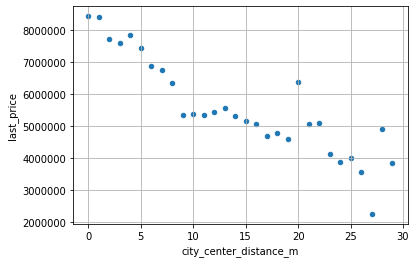

In [57]:
(
    pd.DataFrame(piter_prices.pivot_table(index='city_center_distance_m', values='last_price').to_records())
    .plot(x='city_center_distance_m', y='last_price', kind='scatter', grid=True)
)
plt.show()

#### вывод 
Граница, где график сильно меняется - 8 км -> это и будет центральная зона. 

### Выделим сегмент квартир в центре.

In [58]:
flat_in_center = pd.DataFrame(piter_prices.query('city_center_distance_m <= 8'))
len(flat_in_center)

3061

Проанализируем эти 3061 объект недвижимости. Для начала изучим параметры.

In [59]:
# площадь
flat_in_center.query(total_area_query)['total_area_m2'].describe()

count    2957.000000
mean       63.140923
std        21.036269
min        12.000000
25%        46.000000
50%        61.000000
75%        77.760000
max       115.000000
Name: total_area_m2, dtype: float64

Средняя площадь 61 кв.м.

In [60]:
# цена
flat_in_center['last_price'].describe()

count    3.061000e+03
mean     7.293078e+06
std      2.339291e+06
min      1.600000e+06
25%      5.500000e+06
50%      7.100000e+06
75%      9.000000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Средняя цена 7.1 млн. руб.

In [61]:
# число комнат
flat_in_center.query(rooms_query)['number_of_rooms'].describe()

count    3039.000000
mean        2.311616
std         1.015012
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: number_of_rooms, dtype: float64

- 75% квартир до 3 комнатных квартир
- а половина квартир до 2 комнатных квартир
- максимально только 6 комнатные квартиры 

In [62]:
# высота потолка
flat_in_center.query(ceiling_height_query)['ceiling_height_m2'].describe()

count    2695.000000
mean        2.772954
std         0.198679
min         2.400000
25%         2.650000
50%         2.650000
75%         3.000000
max         3.200000
Name: ceiling_height_m2, dtype: float64

- 75% квартир с высотой потолков до 3 метров
- в среднем квартиры  до 2.65 метров

#### Факторы, влияющие на стоимость квартиры.

In [63]:
clean_data = flat_in_center.query(total_area_query 
                                        and rooms_query 
                                        and ceiling_height_query 
                                        and days_exposition_query)

columns = [
    'last_price',
    'city_center_distance_m',
    'total_area_m2',
    'number_of_rooms',
    'ceiling_height_m2',
    'singly_day_exposition',
    'singly_month_exposition',
    'singly_year_exposition'
]

clean_data[columns].corr().sort_values('last_price', ascending=False)

,last_price,city_center_distance_m,total_area_m2,number_of_rooms,ceiling_height_m2,singly_day_exposition,singly_month_exposition,singly_year_exposition
last_price,1.000000,-0.244486,0.720227,0.505539,0.069210,0.026143,-0.015284,0.027245
total_area_m2,0.720227,-0.256877,1.000000,0.810920,0.088050,-0.000946,0.003051,-0.090171
number_of_rooms,0.505539,-0.213390,0.810920,1.000000,0.053125,-0.012386,0.001773,-0.060992
ceiling_height_m2,0.069210,-0.086910,0.088050,0.053125,1.000000,-0.016308,-0.009511,0.062035
singly_year_exposition,0.027245,0.066346,-0.090171,-0.060992,0.062035,-0.021461,-0.303352,1.000000
singly_day_exposition,0.026143,0.014356,-0.000946,-0.012386,-0.016308,1.000000,0.048287,-0.021461
singly_month_exposition,-0.015284,-0.013584,0.003051,0.001773,-0.009511,0.048287,1.000000,-0.303352
city_center_distance_m,-0.244486,1.000000,-0.256877,-0.213390,-0.086910,0.014356,-0.013584,0.066346


- Квадратура
- Количество комнат
- Высота потолка

Эти факторы больше всего влияют на цену

In [64]:
# этаж
clean_data.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,6.258485e+06
последний,7.278612e+06
другой,7.407367e+06



В Санкт-Петербурге все также самый дешевый этаж – это первый, а самые дорогие – между первым и последним.

### Шаг 5. Общий вывод

Ожидаемо что во 2 столицы - Санкт-Петепбурге квартиры дороже остальных населенных пунктов.
Факторы которые больше всего имею зависимость от цены это:
- Квадратура
- Количество комнат
- Высота потолка

Квартира в центре Санкт-Петерурга влияет не сильно

Зато видно что самые популярные квартиры в Санкт-Петербурге это 2 комнатные на 61 кв.м. с высотой потолков в ~2.65

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод